# Introduction - Welcome to Sales Data Analysis

In this project I analyse sales data for a fictional e-commerce company called Saleslistic. Saleslistic sales products to various satisified customers accross the globe. The company would like to evaluate their sales data to increase their sales and revenue and also improve their marketing strategies.

## Business Task
Saleslistc would like to use data to find insights trends between their sales activities and see ways to improve their sales and revenue by focusing on the answers to the following questions:
1. What months has the highest sales?
2. Which city has the highest orders?
3. What time of the day are most sales happening?
4. What products are sold the most and what are the possible reasons?
5. What products are mainly sold together?

In this project I use python to prepare, transform, analyze and visualize sales data to bring about the insight that the company needs on the above questions.

## Data Source
Data used in this project is a public data and can be downloaded from Kaggle <https://www.kaggle.com/datasets/knightbearr/sales-product-data>

### Preparing the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
#fetching the data from the directory
directory = os.getcwd()
print(directory)

/Users/benjaminbusilana


In [5]:
path = directory + "/Sales_Data/"
os.listdir(path)

['Sales_December_2019.csv',
 '.DS_Store',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [7]:
#Removing the automatic ds file that we do not need...
os.remove(path + ".DS_Store")

In [10]:
#Iterating through all the files
files = [file for file in os.listdir(path)]
for file in files:
    print(file)

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [11]:
#combining all the files into one dataframe.
combined_data = pd.DataFrame()
for file in files:
    current_df = pd.read_csv(path + "/" + file)
    combined_data = pd.concat([combined_data, current_df])
    
combined_data.shape

(186850, 6)

In [13]:
#converting it into csv and save into the current directory
combined_data.to_csv(path + 'combined_data.csv', index=False)

In [14]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [15]:
#checking for missing values
combined_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [16]:
combined_data = combined_data.dropna(how ="all")
combined_data.shape

(186305, 6)

### Determine What Months Had Higher Sales

In [17]:
#finding higher sales(we do not have month column so we have to find it from Order Date)
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [19]:
#getting month from order date
'12/30/19 00:01'.split('/')[0]

'12'

In [20]:
def month(x):
    return x.split('/')[0]

In [22]:
#add a month column based on the logic made to extract the month from the order date
combined_data['month'] = combined_data['Order Date'].apply(month)

In [23]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [24]:
#now we have to have a sales column that we can derive from quanity and price
combined_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [26]:
combined_data['month'].unique()

array(['12', 'Order Date', '01', '04', '05', '02', '03', '08', '09', '06',
       '11', '10', '07'], dtype=object)

In [28]:
#Before converting it into integer we have to get rid of the 'order date' value
filter = combined_data['month'] == 'Order Date'
combined_data = combined_data[~filter]
combined_data['month'].unique()

array(['12', '01', '04', '05', '02', '03', '08', '09', '06', '11', '10',
       '07'], dtype=object)

In [30]:
#Convert it into int
combined_data['month'] = combined_data['month'].astype(int)

In [32]:
combined_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month                int64
dtype: object

In [33]:
combined_data['Quantity Ordered'] = combined_data['Quantity Ordered'].astype(int)
combined_data['Price Each'] = combined_data['Price Each'].astype(float)

In [35]:
#All should be changed into int and float
combined_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
month                 int64
dtype: object

In [36]:
#Creating the sales column (sales = Quantity ordered * Price)
combined_data['sales'] = combined_data['Quantity Ordered'] * combined_data['Price Each']

In [37]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [38]:
combined_data.groupby('month')['sales'].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: sales, dtype: float64

Text(0, 0.5, 'Sales')

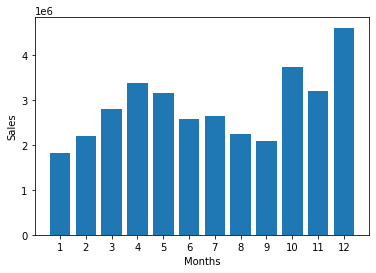

In [41]:
#Visualizing the month of sales
months = range(1, 13)
plt.bar(months, combined_data.groupby('month')['sales'].sum())
plt.xticks(months)
plt.xlabel("Months")
plt.ylabel("Sales")

### Observation
Based on the graph we can draw conclusion that December, October and April have the highest sales. The company can use this result to change their focus on what months they market their products the most.

### Finding Which City Has The Most Orders

In [42]:
#Next is we have to find out which city has the most orders, but we do not have city so we have to derive it from address.
combined_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


In [44]:
#how we can extract the city from purchase address
'136 Church St, New York City, NY 10001'.split(',')[1]

' New York City'

In [45]:
def city(x):
    return x.split(',')[1]

In [46]:
combined_data['city'] = combined_data['Purchase Address'].apply(city)

In [47]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


<AxesSubplot:xlabel='city'>

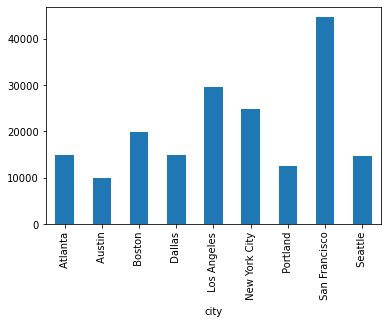

In [50]:
#What city has the most oders
combined_data.groupby('city')['city'].count().plot.bar()

### Observation:
Based on the analysis above we can see that San Franscisco had the most orders, the company can use this information to better shape their marketing strategy for that city and also see what to improve in other cities.

### Finding What Times of The Day Are Most Sales Happening

In [52]:
#Wha time are most sales happening
combined_data['Order Date'].dtypes

dtype('O')

In [54]:
#Change from string to date format and create the hour column that just shows the hours
combined_data['hour'] = pd.to_datetime(combined_data['Order Date']).dt.hour

In [55]:
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [57]:
keys =[]
hour = []
for key,hour_df in combined_data.groupby('hour'):
    keys.append(key)
    hour.append(len(hour_df))

In [58]:
keys

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [60]:
hour

[3910,
 2350,
 1243,
 831,
 854,
 1321,
 2482,
 4011,
 6256,
 8748,
 10944,
 12411,
 12587,
 12129,
 10984,
 10175,
 10384,
 10899,
 12280,
 12905,
 12228,
 10921,
 8822,
 6275]

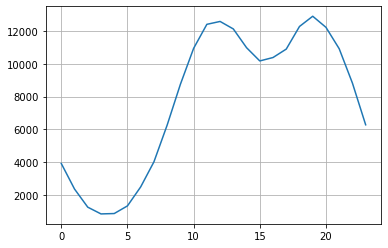

In [62]:
#plotting this
plt.grid()
plt.plot(keys, hour)

### Observation:
Based on that we can see that most orders happen around 12pm and 7pm. That information can be used to maximize sales.

### Let's find out what products are sold the most

In [64]:
#Product sold the most
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [65]:
combined_data.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Product'>

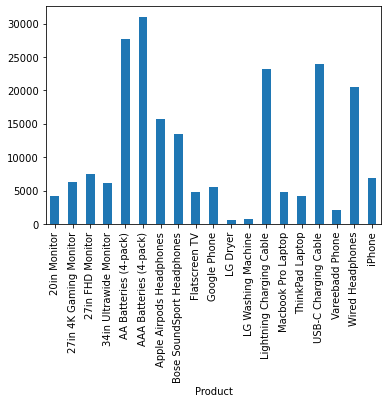

In [66]:
combined_data.groupby('Product')['Quantity Ordered'].sum().plot(kind='bar')

### Observation:
Based on the graph we see that AAA batteries have the highest sales, possible reasons for that is the price of the AAA batteries, notice how that is analyzed below.


In [68]:
#Check price
combined_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [69]:
products = combined_data.groupby('Product')['Quantity Ordered'].sum().index
quantity = combined_data.groupby('Product')['Quantity Ordered'].sum()
price = combined_data.groupby('Product')['Price Each'].mean()

/var/folders/4j/0w5rt1nj0kd78g8_mwwj149w0000gn/T/ipykernel_93248/1234446113.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation ='vertical', size= 8)


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

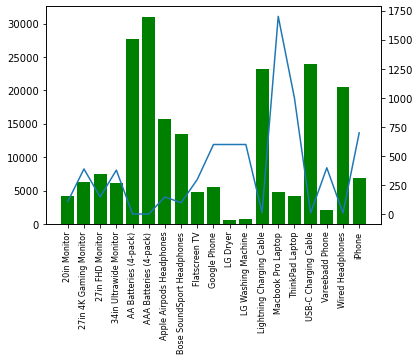

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity, color='g')
ax2.plot(products, price)
ax1.set_xticklabels(products, rotation ='vertical', size= 8)

From this graph we can see that there is a relationship between those two graphs, the cheaper the product the more sales it has, the company can use this information to better consider its pricing and also what products to market

### Now let us see what products are sold together

In [74]:
#products that are sold together
combined_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [75]:
#producs that are sold together have the same order ID, keep the duplicated IDs
new_df = combined_data['Order ID'].duplicated(keep=False)
new_df

0        False
1        False
2        False
3        False
4        False
         ...  
13617    False
13618    False
13619    False
13620    False
13621    False
Name: Order ID, Length: 185950, dtype: bool

In [77]:
df = combined_data[new_df]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14


In [80]:
#Group all products with the same order ID
df['grouped product']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

/var/folders/4j/0w5rt1nj0kd78g8_mwwj149w0000gn/T/ipykernel_93248/2335813857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grouped product']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [81]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,grouped product
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"


In [83]:
#remove the duplicated order ID
df = df.drop_duplicates(subset='Order ID')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hour,grouped product
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14,"Vareebadd Phone,USB-C Charging Cable"
42,295703,AA Batteries (4-pack),1,3.84,2019-12-17 12:27:00,"502 Jefferson St, Austin, TX 73301",12,3.84,Austin,12,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,iPhone,1,700.00,2019-12-25 14:49:00,"203 Lakeview St, Boston, MA 02215",12,700.00,Boston,14,"iPhone,Lightning Charging Cable"
76,295735,iPhone,1,700.00,2019-12-22 18:25:00,"374 Lincoln St, New York City, NY 10001",12,700.00,New York City,18,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [85]:
df['grouped product'].value_counts()

iPhone,Lightning Charging Cable                             882
Google Phone,USB-C Charging Cable                           856
iPhone,Wired Headphones                                     361
Vareebadd Phone,USB-C Charging Cable                        312
Google Phone,Wired Headphones                               303
                                                           ... 
20in Monitor,iPhone                                           1
Google Phone,USB-C Charging Cable,Vareebadd Phone             1
LG Dryer,Google Phone                                         1
20in Monitor,LG Washing Machine                               1
Google Phone,Bose SoundSport Headphones,27in FHD Monitor      1
Name: grouped product, Length: 366, dtype: int64

<AxesSubplot:ylabel='grouped product'>

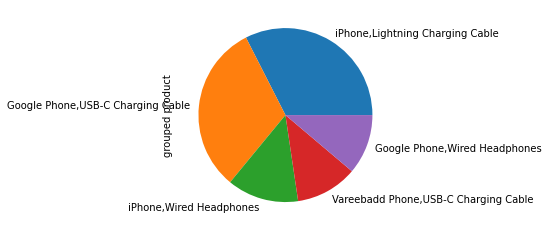

In [86]:
df['grouped product'].value_counts()[0:5].plot.pie()

### Observation:
Based on the chart above we can see that iphone and lightning charing cables are sold together alot and google phone and usb charging cables are sold together alot as well. The company can use this to create make recommendations to users when they make certain purchases so that they can also buy the additional Item.